In [42]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings

In [43]:
class LogisticRegression:
    def __init__(self, learningRate, maxIteration, tolerance):
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.tolerance = tolerance
        self.train_X, self.test_X, self.train_y, self.test_y = self.readDataset()

    def readDataset(self):
        train_df = pd.read_excel("C:/Users/sarav/Desktop/Spring'23/Statistical Learning/Python lab - in class/Logistic Regression and Naive Bayes/Lab3_data.xls", sheet_name = '2004--2005 Data')
        test_df = pd.read_excel("C:/Users/sarav/Desktop/Spring'23/Statistical Learning/Python lab - in class/Logistic Regression and Naive Bayes/Lab3_data.xls", sheet_name = '2004--2007 Data')

        train_df, test_df = train_df.values, test_df.values

        train_X, train_y = train_df[:, 1:], train_df[:, 0]
        test_X, test_y = test_df[:, 1:], test_df[:, 0]
        return train_X, test_X, train_y, test_y

    def remove_index(self, indices):
        train_X = np.delete(self.train_X, indices, axis = 0)
        train_y = np.delete(self.train_y, indices, axis = 0)
        return train_X, train_y
        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, z):
        sig = 1 / (1+ np.exp(-z))
        return sig

    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        loss = y * np.log(sig) + (1-y) * np.log(1-sig)
        cost = - loss.sum()
        return cost

    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig-y).dot(X)
        return grad

    def gradientDescent(self, X, y):
        losses = []
        prev_loss = float('inf')

        for i in tqdm(range(self.maxIteration), colour = 'red'):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_loss = self.costFunction(X, y)
            diff_loss = np.abs(prev_loss - current_loss)
            losses.append(current_loss)

            if diff_loss < self.tolerance:
                print("The model stopped learning")
                break

            prev_loss = current_loss

        #self.plot_cost(losses) ---- need to find the code and add this later from the lecture

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig) 
    


    def fit(self, index = None):
        
        if index != None:
            self.train_X, self.train_y = self.remove_index(index)
        
        self.w = np.ones(self.train_X.shape[1], dtype = np.float64)
        print('Solving using gradient descent')
        self.gradientDescent(self.train_X, self.train_y)

        print("Evaluating the training results")
        y_hat_train = self.predict(self.train_X)

        recall, precision, f_score = self.evaluateFunction(self.train_y, y_hat_train)
        print("The recall of the model was {}".format(recall))
        print("The precision of the model was {}".format(precision))
        print("The F1 score of the model was {}".format(f_score))
        
        self.plot()
        self.scatterPlt()
        self.plot3D()
        
    def evaluateFunction(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat ==1)

        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        f_score = 2 * (precision * recall)/ (precision + recall)

        return recall, precision, f_score
  
    
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.train_X[:, 0], self.train_X[:, 1], 
                     self.sigmoid(self.train_X.dot(self.w)), 
                     c = self.train_y[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)



    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.train_X[:, 0], self.train_X[:, 1], 
                   c=self.train_y[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')


    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.train_X[:, 0], self.train_X[:, 1], 
                   c=self.train_y[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
    
    
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    # def plot function
    # def plot 3d


In [44]:
lr = LogisticRegression(tolerance=0.0, learningRate=0.1e-5, maxIteration= 10000)

Solving using gradient descent


100%|██████████| 10000/10000 [00:00<00:00, 21955.27it/s]


Evaluating the training results
The recall of the model was 0.9722222222222222
The precision of the model was 0.9210526315789473
The F1 score of the model was 0.9459459459459458


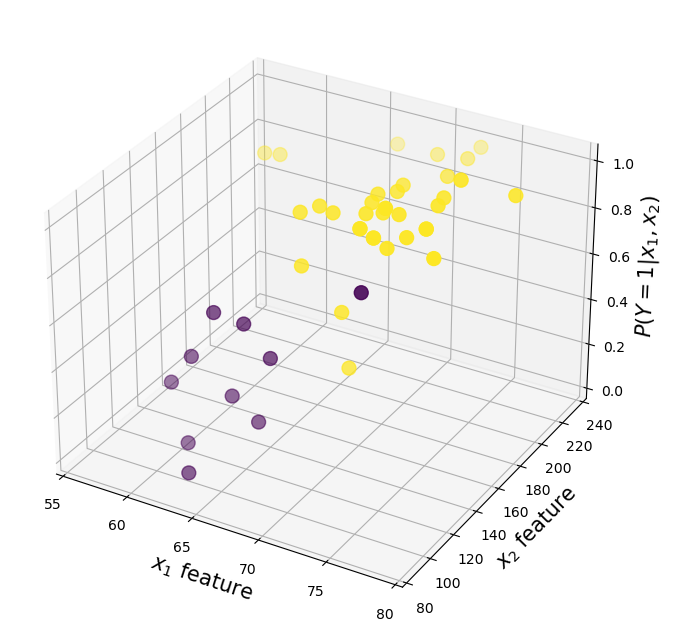

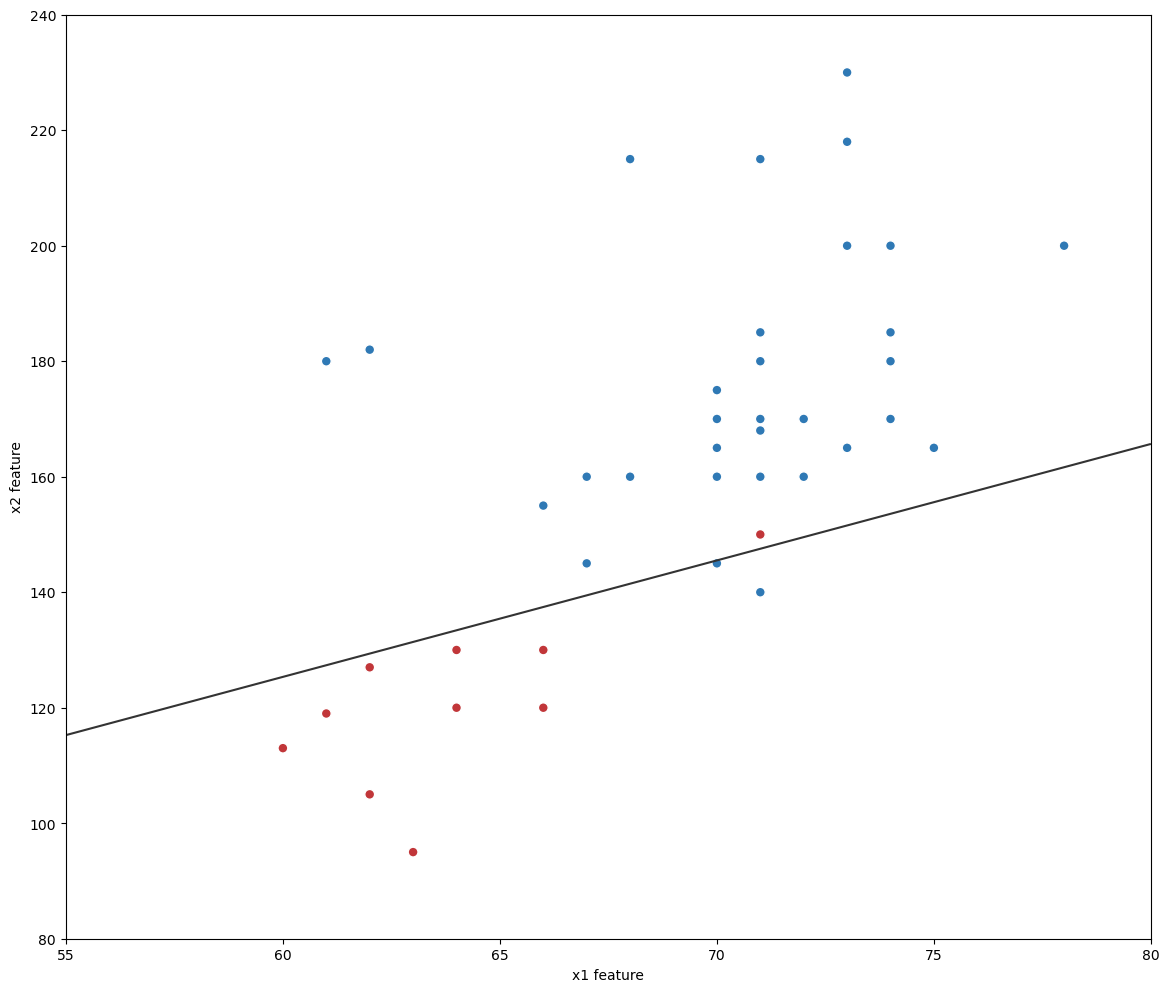

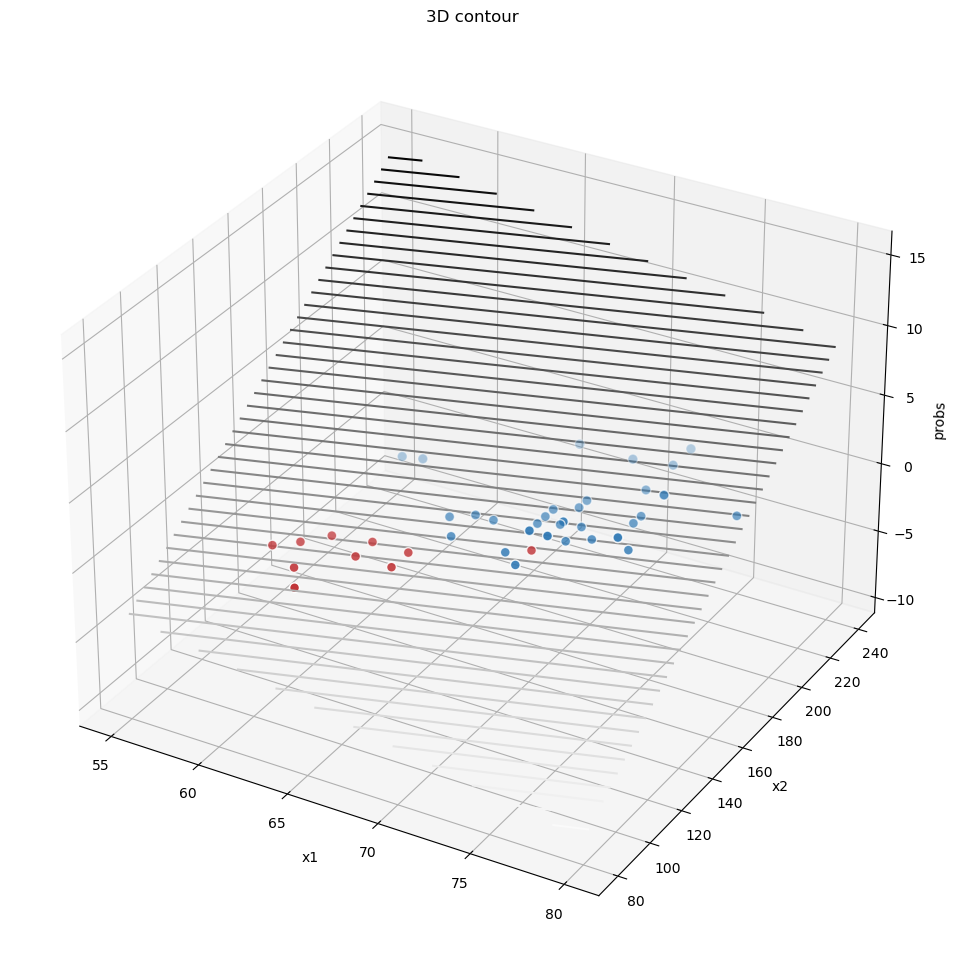

In [45]:
lr.fit()

In [46]:
lr2 = LogisticRegression(tolerance=0.0, learningRate=0.1e-5, maxIteration= 10000)

Solving using gradient descent


100%|██████████| 10000/10000 [00:00<00:00, 23562.01it/s]


Evaluating the training results
The recall of the model was 1.0
The precision of the model was 0.9459459459459459
The F1 score of the model was 0.9722222222222222


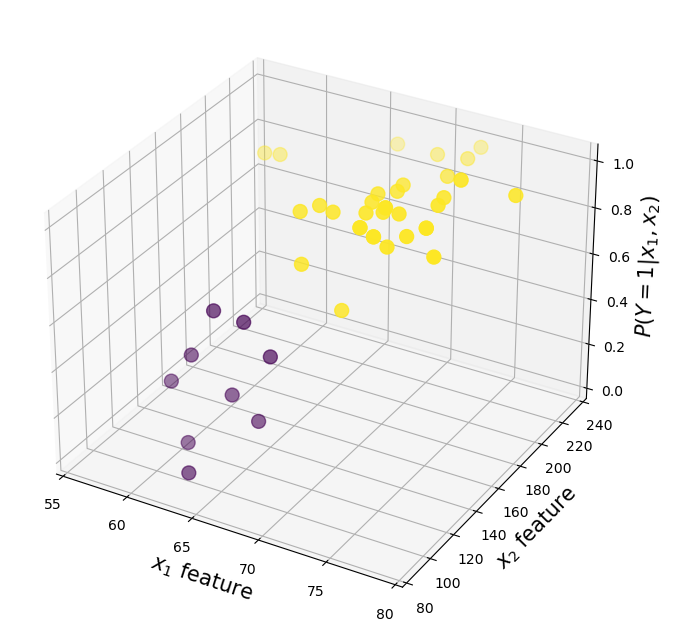

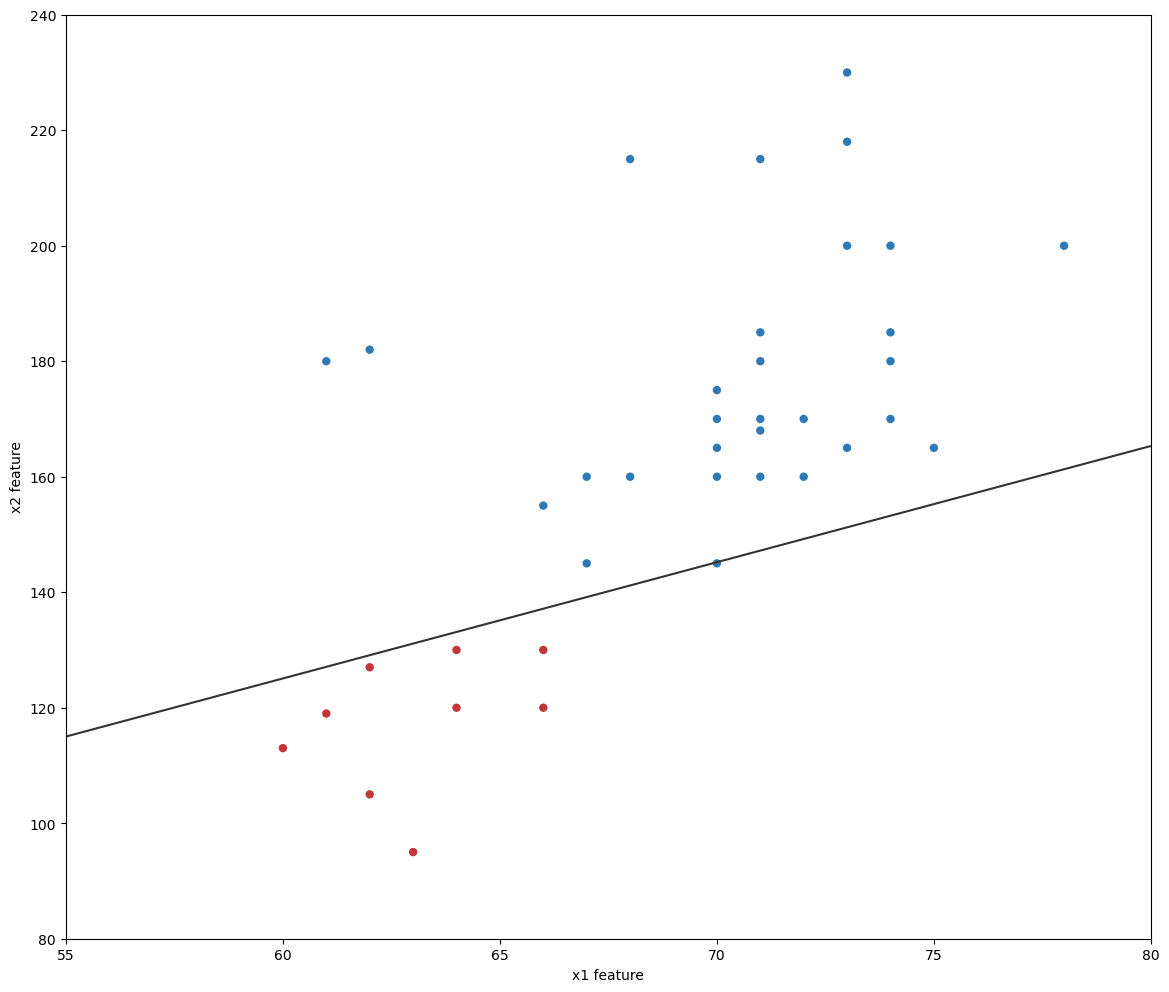

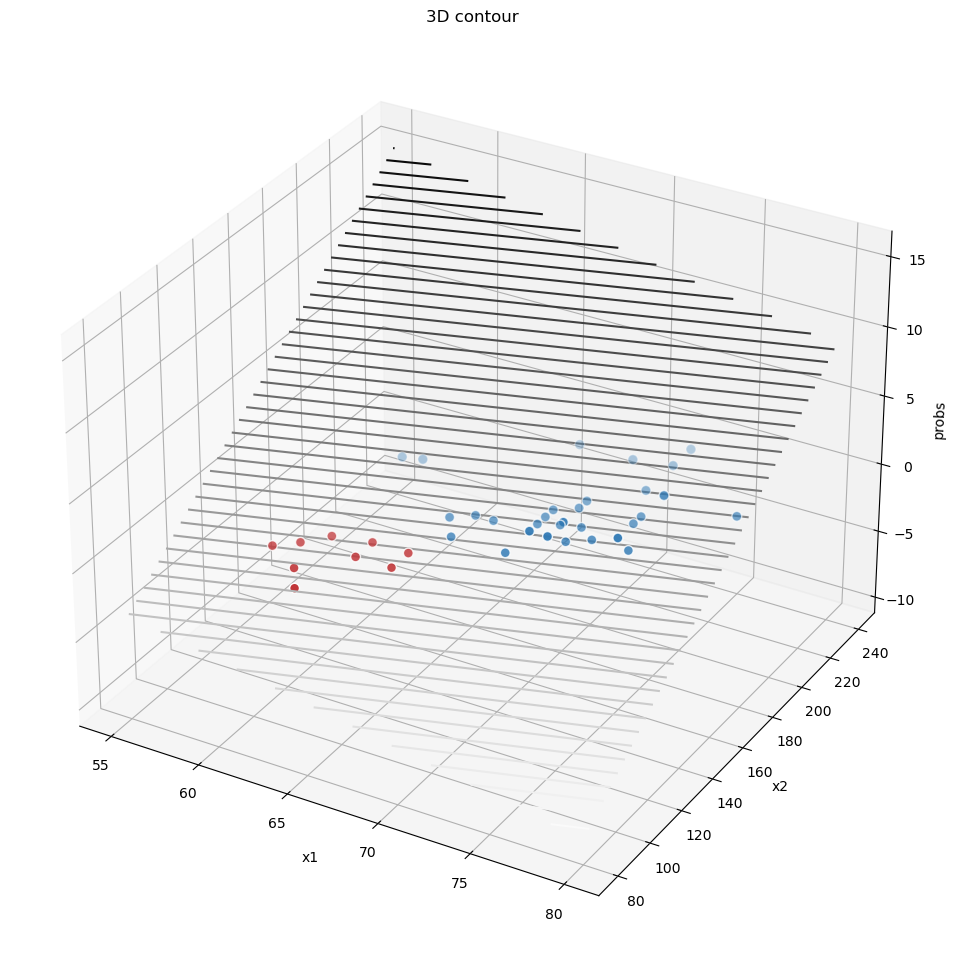

In [47]:
lr2.fit([0,38])

## Why does removing data points 1 and 39 has an effect on the predicted probability?

These two points are very close to the decision boundary, by removing them the recall became 1, meaning all positive point are classified correctly. The precision also increased to 94.5%.

The F1 score also increased to 97%. The graphs with the desicion boundary clearly shows the differences between removing and not removing the data points.